In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from pathlib import Path

In [2]:
# signal
df = pd.read_csv('Dijet_bb_pt10_15_dw.csv')

# background
df2 = pd.read_csv('Dijet_qq_pt10_15_dw.csv')

In [3]:
# filter to only include Jet0 data
df = df.filter(regex='Jet0')
df2 = df2.filter(regex='Jet0')

In [4]:
# create new csv files w smaller dataframe

filepath = Path('Jet0bb.csv')  
filepath2 = Path('Jet0qq.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
filepath2.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  
df2.to_csv(filepath2)  

In [5]:
# signal (Jet 0 only)
df = pd.read_csv('Jet0bb.csv')

# background (Jet 0 only)
df2 = pd.read_csv('Jet0qq.csv')

In [6]:
# view column names
list(df.columns[:50])

['Unnamed: 0',
 'Jet0_ENDVERTEX_X',
 'Jet0_ENDVERTEX_Y',
 'Jet0_ENDVERTEX_Z',
 'Jet0_ENDVERTEX_XERR',
 'Jet0_ENDVERTEX_YERR',
 'Jet0_ENDVERTEX_ZERR',
 'Jet0_ENDVERTEX_CHI2',
 'Jet0_ENDVERTEX_NDOF',
 'Jet0_OWNPV_X',
 'Jet0_OWNPV_Y',
 'Jet0_OWNPV_Z',
 'Jet0_OWNPV_XERR',
 'Jet0_OWNPV_YERR',
 'Jet0_OWNPV_ZERR',
 'Jet0_OWNPV_CHI2',
 'Jet0_OWNPV_NDOF',
 'Jet0_IP_OWNPV',
 'Jet0_IPCHI2_OWNPV',
 'Jet0_FD_OWNPV',
 'Jet0_FDCHI2_OWNPV',
 'Jet0_DIRA_OWNPV',
 'Jet0_ORIVX_X',
 'Jet0_ORIVX_Y',
 'Jet0_ORIVX_Z',
 'Jet0_ORIVX_XERR',
 'Jet0_ORIVX_YERR',
 'Jet0_ORIVX_ZERR',
 'Jet0_ORIVX_CHI2',
 'Jet0_ORIVX_NDOF',
 'Jet0_FD_ORIVX',
 'Jet0_FDCHI2_ORIVX',
 'Jet0_DIRA_ORIVX',
 'Jet0_P',
 'Jet0_PT',
 'Jet0_PE',
 'Jet0_PX',
 'Jet0_PY',
 'Jet0_PZ',
 'Jet0_MM',
 'Jet0_MMERR',
 'Jet0_M',
 'Jet0_ID',
 'Jet0_Eta',
 'Jet0_Phi',
 'Jet0_MLoKi',
 'Jet0_MMLoKi',
 'Jet0_NTrk',
 'Jet0_N90',
 'Jet0_MTF']

In [404]:
# customized plot function 
def custom_plot(sig, back, bns, rng, title, lg):
    plt.hist(sig, label="Signal", bins=bns, range=rng, histtype='step',  log=lg)
    plt.hist(back, label="Background", bins=bns, range=rng, histtype='step', log=lg)
    plt.legend(loc='best')
    plt.title(title);

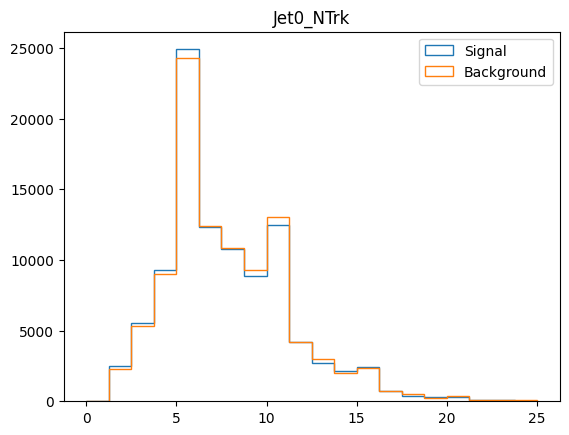

In [407]:
# histogram using custom plot function with log scale
custom_plot(df.Jet0_NTrk, df2.Jet0_NTrk, 20, [0,25], "Jet0_NTrk", False)

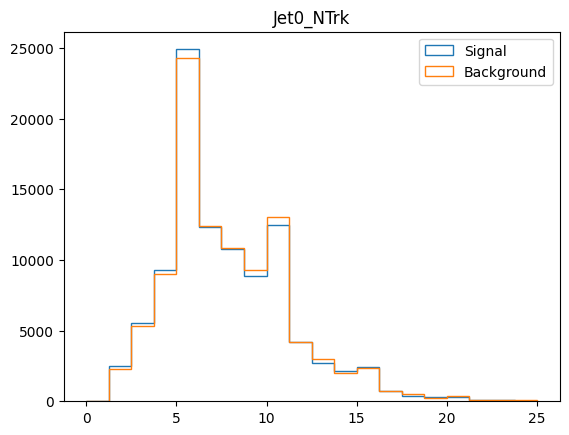

In [408]:
# histogram of Jet0_NTrk
plt.hist(df.Jet0_NTrk, label="Signal", bins=20, range =[0,25], histtype='step')
plt.hist(df2.Jet0_NTrk, label="Background", bins=20, range=[0,25], histtype='step')
plt.legend(loc='best')
plt.title("Jet0_NTrk");

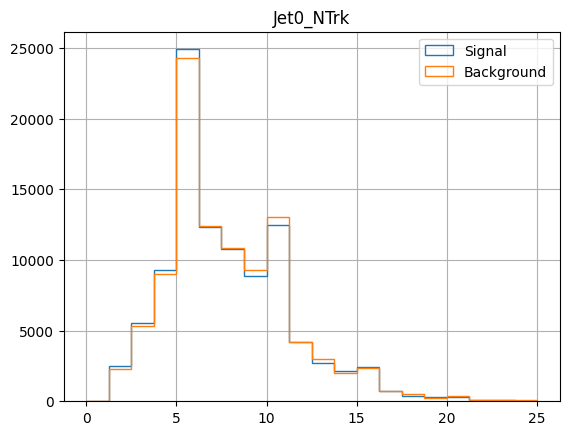

In [409]:
# histogram of Jet0_NTrk to make sure the plots look the same
ax = df.hist(column='Jet0_NTrk', bins=20, range =[0,25], histtype='step')
df2.hist(ax=ax, column='Jet0_NTrk', bins=20, range=[0,25], histtype='step')
plt.legend(["Signal", "Background"]);

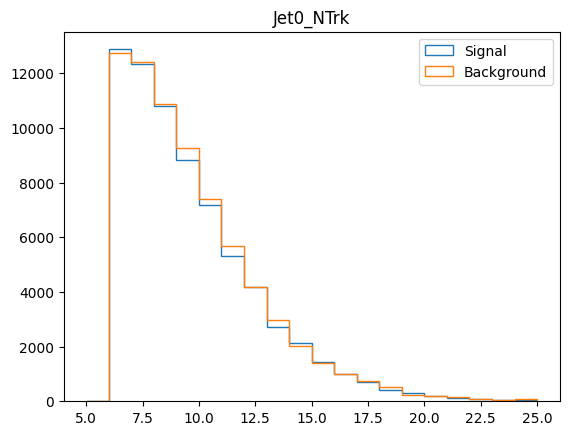

In [504]:
# only plot Jet0_NTrk > 5
dfcut = df[df.Jet0_NTrk > 5]
df2cut = df2[df2.Jet0_NTrk > 5]

plt.hist(dfcut.Jet0_NTrk, label="Signal", bins=20, range=[5,25], histtype='step')
plt.hist(df2cut.Jet0_NTrk, label="Background", bins=20, range=[5,25], histtype='step')
plt.legend(loc='best')
plt.title("Jet0_NTrk");

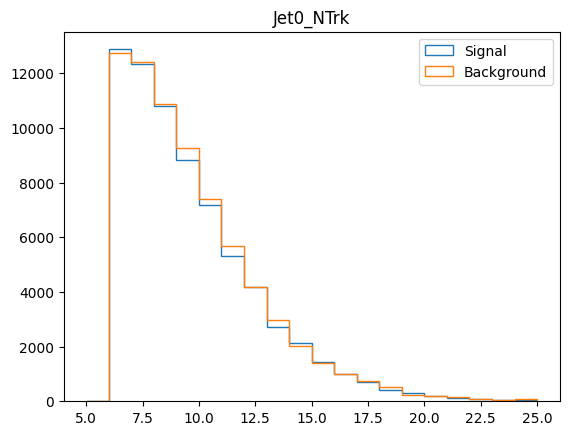

In [503]:
custom_plot(dfcut.Jet0_NTrk, df2cut.Jet0_NTrk, 20, [5,25], "Jet0_NTrk", False)

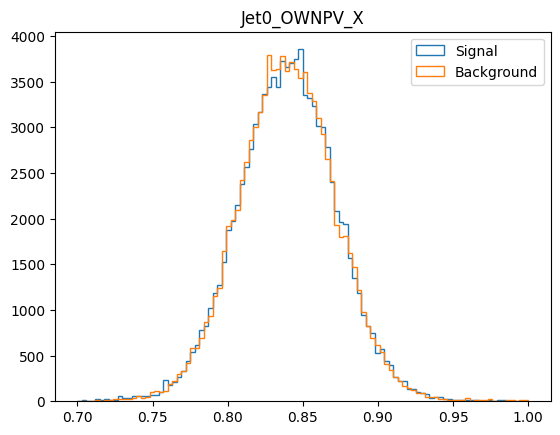

In [507]:
# plot of OWNPV X
# range = [0.7,1] on linear scale
custom_plot(df.Jet0_OWNPV_X, df2.Jet0_OWNPV_X, 100, [0.7,1], "Jet0_OWNPV_X", False)

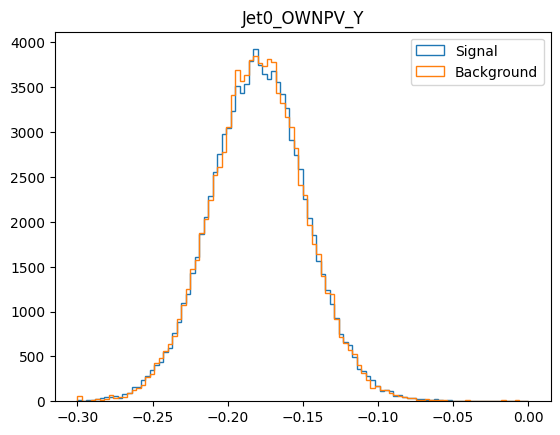

In [413]:
# plot of Jet0_OWNPV_Y
# range = [-0.3,0] on linear scale
custom_plot(df.Jet0_OWNPV_Y, df2.Jet0_OWNPV_Y, 100, [-0.3,0], "Jet0_OWNPV_Y", False)

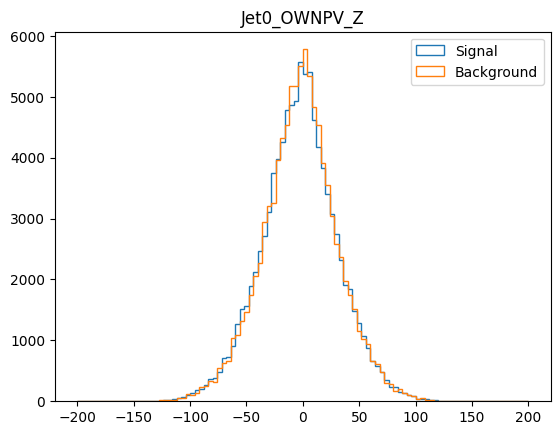

In [420]:
# plot of Jet0_OWNPV_Z
# range = [-200,200] on linear scale
custom_plot(df.Jet0_OWNPV_Z, df2.Jet0_OWNPV_Z, 100, [-200,200], "Jet0_OWNPV_Z", False)

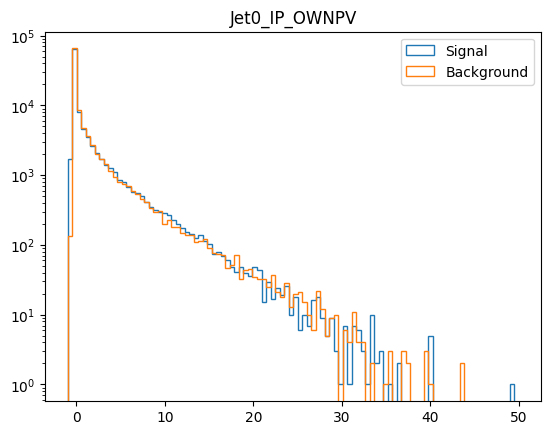

In [432]:
# plot of Jet0_IP_OWNPV
# range = [-10,10] on linear scale
# range = [-1,50] on log scale
custom_plot(df.Jet0_IP_OWNPV, df2.Jet0_IP_OWNPV, 100, [-1,50], "Jet0_IP_OWNPV", True)

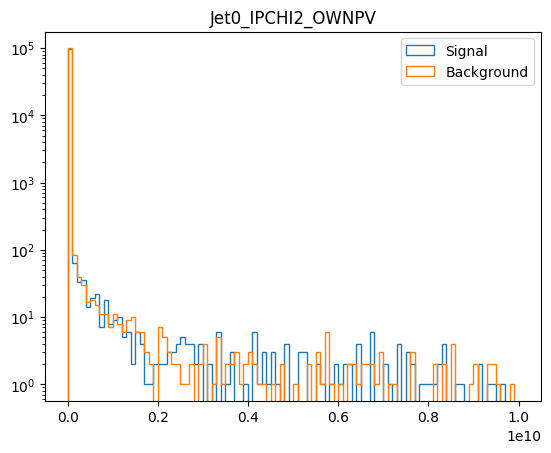

In [462]:
# plot of Jet0_IPCHI2_OWNPV
# range = [-0.1,0.5] on linear scale
# range = [-0.01,0.5] on log scale
custom_plot(df.Jet0_IPCHI2_OWNPV, df2.Jet0_IPCHI2_OWNPV, 100, [-0.01,1e10], "Jet0_IPCHI2_OWNPV", True)

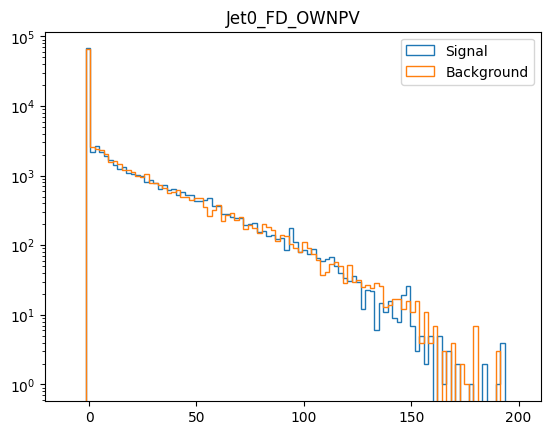

In [468]:
# plot of Jet0_FD_OWNPV
# range = [-0.001,0.015] on linear scale
# range = [-0.001,0.015] on log scale
custom_plot(df.Jet0_FD_OWNPV, df2.Jet0_FD_OWNPV, 100, [-10,200], "Jet0_FD_OWNPV", True)

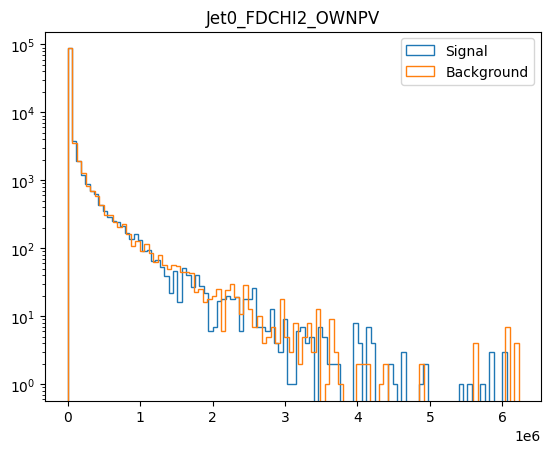

In [477]:
# plot of Jet0_FDCHI2_OWNPV
# range = [0,0.01] on linear scale
custom_plot(df.Jet0_FDCHI2_OWNPV, df2.Jet0_FDCHI2_OWNPV, 100, None, "Jet0_FDCHI2_OWNPV", True)

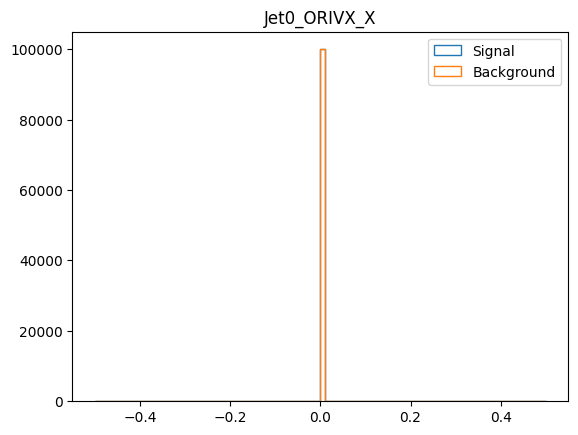

In [483]:
# plot of Jet0_ORIVX_X
custom_plot(df.Jet0_ORIVX_X, df2.Jet0_ORIVX_X, 100, None, "Jet0_ORIVX_X", False)

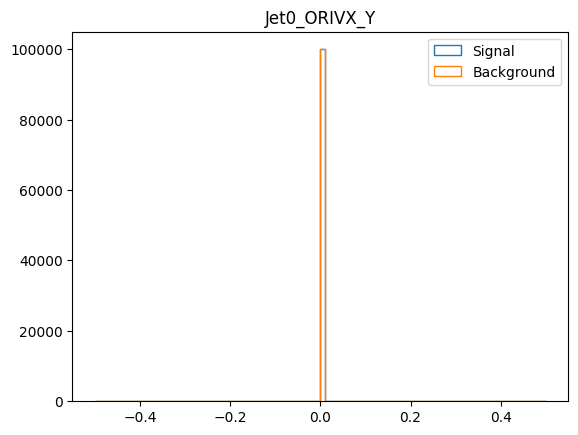

In [368]:
# plot of Jet0_ORIVX_Y
custom_plot(df.Jet0_ORIVX_Y, df2.Jet0_ORIVX_Y, None, "Jet0_ORIVX_Y", False)

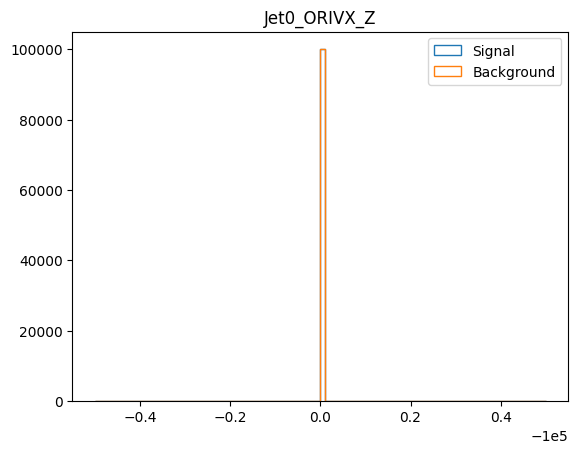

In [369]:
# plot of Jet0_ORIVX_Z
custom_plot(df.Jet0_ORIVX_Z, df2.Jet0_ORIVX_Z, None, "Jet0_ORIVX_Z", False)

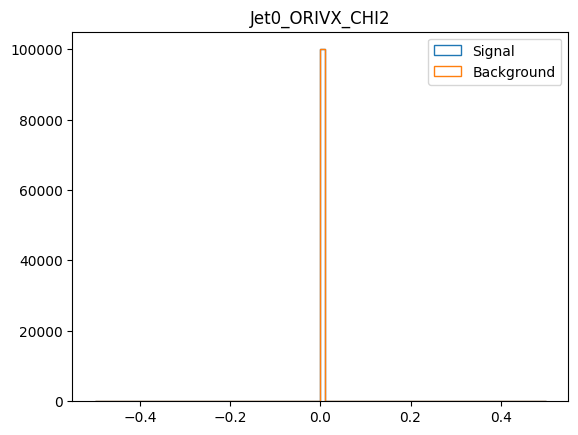

In [370]:
# plot of Jet0_ORIVX_CHI2
custom_plot(df.Jet0_ORIVX_CHI2, df2.Jet0_ORIVX_CHI2, None, "Jet0_ORIVX_CHI2", False)

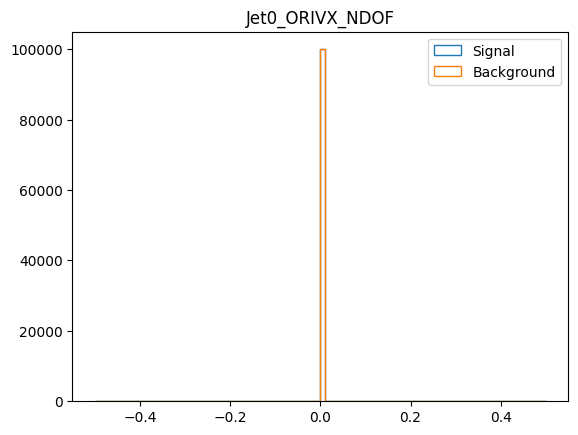

In [371]:
# plot of Jet0_ORIVX_NDOF
custom_plot(df.Jet0_ORIVX_NDOF, df2.Jet0_ORIVX_NDOF, None, "Jet0_ORIVX_NDOF", False)

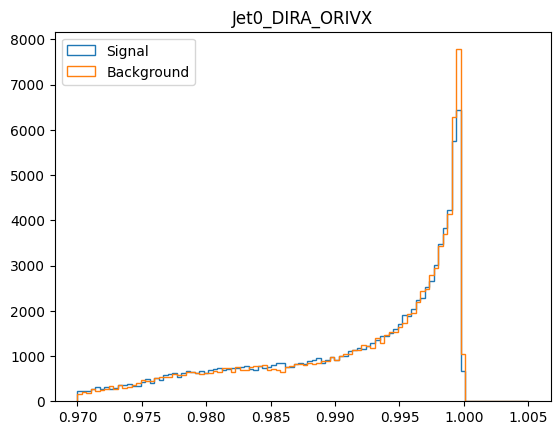

In [499]:
# plot of Jet0_DIRA_ORIVX
# range = [0.97,1.005] on linear scale
custom_plot(df.Jet0_DIRA_ORIVX, df2.Jet0_DIRA_ORIVX, 100, [0.97,1.005], "Jet0_DIRA_ORIVX", False)